In [23]:
import pandas as pd
Train_data=pd.read_csv("Trainingnewhurdle.csv")
Train_data.describe()

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
count,34.000000,2.400000e+01,24.000000,2.300000e+01,23.000000,3.300000e+01,33.000000,1.000000e+01,7.000000e+00,34.000000,10.000000,34.000000,34.00000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,11.000000,22.000000,34.000000,3.400000e+01,34.000000,34.000000,34.000000,34.000000,12.000000,12.000000,34.000000,34.000000,34.000000,34.000000,3.400000e+01,34.000000,34.000000,34.000000
mean,323.714126,1.229424e+07,51957.191257,3.833919e+06,42576.886790,2.008683e+06,32298.947990,9.930678e+08,3.202352e+06,11.926924,14.556558,87.187390,56.52500,0.392647,10.093794,0.017502,15558.116176,43.377300,52.071985,7.121763,5.190196,1.666359,1.527666,6.004528e+09,26.045311,2.440383,0.022863,38.445437,46.059377,32.008333,102.146076,38.875958,44.441234,65.281623,2.116786e+06,491206.186838,0.101033,42.335193
std,121.512386,1.021964e+07,42730.005851,4.195661e+06,47739.241098,3.640760e+06,55891.752513,1.290923e+09,3.299834e+06,11.547587,28.263605,19.653386,15.36585,0.169939,1.158548,0.005659,19845.802503,0.747459,3.842254,3.800814,1.200006,1.958047,0.091997,2.095679e+09,9.490019,0.107286,0.018517,2.616143,23.453339,17.100583,8.806682,5.196502,2.978976,4.541603,3.923903e+05,190921.519843,0.098598,2.921126
min,130.937361,2.160000e+04,2006.674000,2.989220e+04,1800.344000,1.400000e-05,0.000015,2.880720e+04,3.505506e+02,0.102858,0.003853,20.000000,32.95000,0.095000,7.473000,0.007832,365.430000,42.140000,44.782569,0.328645,1.633989,0.033276,1.423408,2.904612e+09,13.036065,2.075661,0.000238,32.483718,7.080951,2.200000,83.883480,32.368993,38.550768,57.583497,1.504339e+06,249237.493500,0.001659,35.480731
25%,238.093094,3.790024e+06,20550.501500,4.027655e+05,5787.389000,1.666492e-05,0.000020,2.213975e+07,1.919365e+05,1.626260,0.576111,79.241071,43.67500,0.273750,9.358750,0.013435,837.805000,42.736071,49.482521,5.397553,5.337889,0.226414,1.451267,4.469045e+09,15.931733,2.377454,0.006120,36.719295,32.072282,23.100000,97.051358,35.735922,41.852452,62.279815,1.862576e+06,341256.702100,0.031307,40.448477
50%,292.629436,9.857390e+06,35200.696745,3.006588e+06,23205.988710,2.374541e+03,404.646896,5.313167e+07,3.113695e+06,10.404517,2.535400,100.000000,57.30000,0.392500,9.901500,0.018639,1625.310000,43.568214,51.219477,7.736179,5.559575,1.008699,1.490983,5.615173e+09,24.704770,2.437324,0.022350,38.485672,40.652666,35.100000,100.759645,37.346033,44.606922,64.901897,2.013858e+06,423234.196000,0.078852,42.941337
75%,445.078677,1.695319e+07,81174.671148,5.946668e+06,68823.001675,1.449305e+06,48695.386310,2.012685e+09,5.150618e+06,18.219558,7.950401,100.000000,71.08750,0.537500,10.918750,0.021555,34109.938785,44.000000,54.003264,8.762272,5.681166,1.826176,1.594085,7.887609e+09,34.926837,2.497038,0.033100,39.639360,54.696999,44.700000,105.313414,40.609072,45.690191,67.734576,2.395357e+06,624275.869825,0.135781,44.038246
max,546.053084,4.039739e+07,153276.592000,1.830051e+07,170507.762800,1.205852e+07,207179.200500,3.119656e+09,8.617309e+06,47.442188,88.182705,100.000000,77.35000,0.740000,12.286000,0.026884,61675.321620,44.450000,60.677869,16.538448,5.844973,7.925424,1.702518,8.706898e+09,39.441025,2.664421,0.070100,43.829172,100.000000,54.600000,121.889647,57.797794,50.753726,75.555801,2.867307e+06,856242.939400,0.430051,47.522960


In [0]:
Valid=pd.read_csv("Testnewhurdle.csv")

In [25]:
Train_data.columns

Index(['Period', 'EQ', 'Social_Search_Impressions',
       'Social_Search_Working_cost', 'Digital_Impressions',
       'Digital_Working_cost', 'Print_Impressions.Ads40',
       'Print_Working_Cost.Ads50', 'OOH_Impressions', 'OOH_Working_Cost',
       'SOS_pct', 'Digital_Impressions_pct', 'CCFOT', 'Median_Temp',
       'Median_Rainfall', 'Fuel_Price', 'Inflation', 'Trade_Invest',
       'Brand_Equity', 'Avg_EQ_Price', 'Any_Promo_pct_ACV', 'Any_Feat_pct_ACV',
       'Any_Disp_pct_ACV', 'EQ_Base_Price', 'Est_ACV_Selling', 'pct_ACV',
       'Avg_no_of_Items', 'pct_PromoMarketDollars_Category', 'RPI_Category',
       'Magazine_Impressions_pct', 'TV_GRP', 'Competitor1_RPI',
       'Competitor2_RPI', 'Competitor3_RPI', 'Competitor4_RPI', 'EQ_Category',
       'EQ_Subcategory', 'pct_PromoMarketDollars_Subcategory',
       'RPI_Subcategory'],
      dtype='object')

In [0]:
Train_data_final=Train_data.loc[:,['Avg_no_of_Items',
                             'EQ']]

In [27]:
Train_data_final.head()

,Avg_no_of_Items,EQ
0,2.611782,504.784933
1,2.522814,490.226477
2,2.477322,479.244686
3,2.520409,489.057428
4,2.497285,477.031994


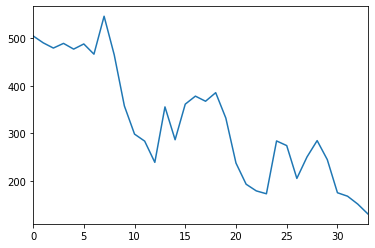

In [28]:
Train_data['EQ'].plot()

In [29]:
Train_data_final

,Avg_no_of_Items,EQ
0,2.611782,504.784933
1,2.522814,490.226477
2,2.477322,479.244686
3,2.520409,489.057428
4,2.497285,477.031994
5,2.455277,487.855299
6,2.412757,466.399281
7,2.641764,546.053084
8,2.559809,464.925607
9,2.664421,357.648693


In [0]:
from sklearn.preprocessing import MinMaxScaler


In [0]:
scaler = MinMaxScaler()
#scaler.fit(Train_data_final)
normalized_train_data=scaler.fit_transform(Train_data_final)

In [0]:
from statsmodels.tsa.vector_ar.var_model import VAR


In [33]:
model = VAR(endog=normalized_train_data)
#model_fit = model.fit()
#model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -8.193706846129768
BIC :  -7.921614562226771
FPE :  0.0002766658504081109
HQIC:  -8.10215607131485 

Lag Order = 2
AIC :  -8.000589239856565
BIC :  -7.54254677023165
FPE :  0.0003370001621088807
HQIC:  -7.848761119948792 

Lag Order = 3
AIC :  -7.9101771594199155
BIC :  -7.26257003481372
FPE :  0.0003728485298030832
HQIC:  -7.699073384658609 

Lag Order = 4
AIC :  -7.624425429201033
BIC :  -6.783707000203741
FPE :  0.0005073309467527257
HQIC:  -7.355472380359183 

Lag Order = 5
AIC :  -7.5120773159759935
BIC :  -6.474818410469013
FPE :  0.0005918227937031619
HQIC:  -7.187220767418069 

Lag Order = 6
AIC :  -7.241193090414897
BIC :  -6.004146045252208
FPE :  0.0008356570833970081
HQIC:  -6.8630154760833655 

Lag Order = 7
AIC :  -7.126151926880982
BIC :  -5.686333186876172
FPE :  0.001067059854563648
HQIC:  -6.698018335136963 

Lag Order = 8
AIC :  -7.144601816799652
BIC :  -5.499398651694636
FPE :  0.0013174788175096001
HQIC:  -6.670842833144149 

Lag Order = 9
AIC

In [34]:
x = model.select_order(maxlags=10)
x.summary()

,AIC,BIC,FPE,HQIC
0,-7.260,-7.162,0.0007033,-7.234
1,-8.156*,-7.861*,0.0002878*,-8.078*
2,-7.897,-7.407,0.0003763,-7.767
3,-7.785,-7.098,0.0004305,-7.603
4,-7.598,-6.715,0.0005413,-7.364
5,-7.712,-6.632,0.0005185,-7.426
6,-7.463,-6.187,0.0007437,-7.125
7,-7.298,-5.826,0.001043,-6.908
8,-7.297,-5.628,0.001367,-6.854
9,-7.293,-5.428,0.002120,-6.798


In [35]:
model_fitted = model.fit(7)


model_fitted

In [0]:
prediction = model_fitted.forecast(y=normalized_train_data[-7:], steps=len(Valid))
#Valid.head()

In [37]:
prediction

array([[0.46710183, 0.04480087],
       [0.444907  , 0.10850351],
       [0.42480054, 0.15085874],
       [0.51314211, 0.18956352],
       [0.51103246, 0.15016031]])

In [38]:
import matplotlib.pyplot as plt
pd.concat([Train_data,Valid]).head()

,Period,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,2016 - Period:1,504.784933,NaN,NaN,37148.2,2045.282,NaN,NaN,NaN,NaN,7.446883,NaN,100.0,32.950,0.5150,8.226,0.013258,42744.25684,42.410000,49.091447,9.691794,NaN,1.688896,1.427532,8696587915,39.441025,2.611782,0.0339,35.817030,NaN,NaN,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,2016 - Period:2,490.226477,NaN,NaN,50886.8,2370.584,0.000014,0.000015,NaN,NaN,11.677082,NaN,87.5,34.625,0.2700,7.473,0.009938,36290.43956,42.410000,49.057612,9.415938,NaN,1.687952,1.442716,8682307085,38.417224,2.522814,0.0391,36.389065,NaN,NaN,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,2016 - Period:3,479.244686,NaN,NaN,253333.2,3180.888,0.000016,0.000017,NaN,NaN,0.102858,NaN,96.0,46.700,0.3900,8.001,0.007832,34852.14166,42.410000,49.367514,5.176684,NaN,NaN,1.423408,8706897549,36.499442,2.477322,0.0228,36.599984,NaN,NaN,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,2016 - Period:4,489.057428,NaN,NaN,3426239.0,13595.398,0.000016,0.000019,NaN,NaN,0.249055,NaN,100.0,49.650,0.3500,8.767,0.010034,24869.55899,43.543571,50.657634,6.088273,NaN,NaN,1.443401,8660288592,38.135159,2.520409,0.0147,38.201852,NaN,NaN,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,2016 - Period:5,477.031994,NaN,NaN,552197.8,3983.134,0.000016,0.000019,NaN,NaN,13.338804,NaN,100.0,58.100,0.5025,9.277,0.009546,61675.32162,43.790000,50.625777,7.827112,NaN,0.170731,1.473687,8644518558,38.629564,2.497285,0.0219,38.648805,31.702433,25.3,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


In [39]:
pd.concat([Train_data.iloc[:,1],Valid.iloc[:,1]])

0     504.784933
1     490.226477
2     479.244686
3     489.057428
4     477.031994
5     487.855299
6     466.399281
7     546.053084
8     464.925607
9     357.648693
10    298.553287
11    283.797430
12    239.231622
13    355.652264
14    286.705586
15    361.444714
16    378.273911
17    367.547047
18    385.537890
19    332.150377
20    237.713584
21    193.300754
22    179.292503
23    173.237305
24    284.183292
25    274.430757
26    205.499984
27    250.555064
28    284.895480
29    244.931359
30    175.432319
31    168.106665
32    151.642231
33    130.937361
0     392.326431
1     300.922056
2     247.315476
3     278.317524
4     161.529279
Name: EQ, dtype: float64

In [40]:
import numpy as np
scaler = MinMaxScaler()
#scaler.fit(np.array(pd.concat([Train_data,Valid]).iloc[:,1]).reshape(-1, 1))
normalized_complete_data=scaler.fit_transform(np.array(pd.concat([Train_data.iloc[:,1],Valid.iloc[:,1]])).reshape(-1, 1))
normalized_complete_data

array([[0.90058639],
       [0.86551556],
       [0.83906078],
       [0.86269935],
       [0.83373048],
       [0.85980347],
       [0.80811663],
       [1.        ],
       [0.8045666 ],
       [0.54614007],
       [0.4037812 ],
       [0.36823483],
       [0.26087728],
       [0.54133074],
       [0.37524048],
       [0.55528456],
       [0.59582554],
       [0.56998488],
       [0.61332422],
       [0.48471548],
       [0.25722038],
       [0.15023135],
       [0.11648593],
       [0.10189916],
       [0.36916436],
       [0.34567083],
       [0.17961889],
       [0.28815508],
       [0.37088   ],
       [0.27460776],
       [0.10718688],
       [0.08953962],
       [0.04987735],
       [0.        ],
       [0.6296776 ],
       [0.40948749],
       [0.28035102],
       [0.35503392],
       [0.07369492]])

In [41]:
np.array(pd.concat([Train_data,Valid]).iloc[:,1]).reshape(-1, 1)

array([[504.7849334],
       [490.2264774],
       [479.2446856],
       [489.0574275],
       [477.0319938],
       [487.8552994],
       [466.3992813],
       [546.0530843],
       [464.9256065],
       [357.6486931],
       [298.553287 ],
       [283.7974301],
       [239.2316222],
       [355.6522644],
       [286.705586 ],
       [361.4447145],
       [378.2739106],
       [367.5470472],
       [385.53789  ],
       [332.1503773],
       [237.7135844],
       [193.3007544],
       [179.2925035],
       [173.2373049],
       [284.1832918],
       [274.4307568],
       [205.4999844],
       [250.555064 ],
       [284.8954797],
       [244.9313589],
       [175.4323186],
       [168.1066651],
       [151.6422314],
       [130.9373608],
       [392.3264313],
       [300.9220559],
       [247.3154761],
       [278.3175236],
       [161.529279 ]])

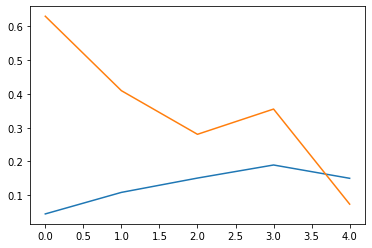

In [42]:
import matplotlib.pyplot as plt
plt.plot(prediction[:,1] )
plt.plot(normalized_complete_data[-len(Valid):])


***Mean squared error regression loss***

In [43]:
from sklearn.metrics import mean_squared_error

mean_squared_error(normalized_complete_data[-len(Valid):], prediction[:,1])

0.09653355984684114

**PREDICTIONS**

In [44]:

pred = scaler.inverse_transform(np.array(prediction[:,1]).reshape(-1,1))
pred

array([[149.53490626],
       [175.9788747 ],
       [193.56119486],
       [209.62815717],
       [193.27126544]])